# `ES 157` Notebook Y: Maximum Likelihood, MAP, and PCA

We spent the last few weeks talking a lot about _maximum likelihood_ and the _maximum a posteriori_ estimators, as well as _principal component analysis_. We went through a lot of math during class and sections, so in this notebook we will spend some time visualizing concepts that we saw in class.

At the end of this notebook you will
1. have a better understanding of the maximum likelihood and MAP estimators,
2. have seen how the MAP and maximum likelihood estimators are related, and
3. have a better understanding of how PCA works and it's properties.

As we always, let us import some needed libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

##  Maximum Likelihood vs MAP 📙

During class and previous sections, we derived analytically both the maximum likelihood and the MAP estimators, for various settings, and we saw how they are related. However, here we would like to emphasize the _likelihood function_ and the _aposteriori function_ are, well, _functions_ of $\theta$.

For our setting, we will consider again the case of *Gaussian* i.i.d. random variables $X_1, \ldots, X_n \sim \mathcal{N}(\theta^{\ast}, \sigma^2)$, each generating a _single_ sample $x_1, \ldots, x_n$. In what follows, we will try to estimate the _unknown_ mean of the random variables $\theta^{\ast}$.

### Maximum Likelihood estimation
When computing the maximum likelihood estimate, we make no assumption about the distribution of $\theta^{\ast}$. This basically means we have _no information_ about what $\theta^{\ast}$ "looks like", so we're solely using the data to find the best estimate. The likelihood function in this case, as we saw in class, is given by

<center>$L(\theta \mid \mathbf{x}) = \frac{1}{(2\pi\sigma^2)^{\frac{n}{2}}} e^{-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \theta)^2}$.</center>

Then, the maximum likelihood estimator is given by

<center>$\hat{\theta}_{\textrm{ML}} = \frac{1}{n}\sum_{i=1}^{n}x_i$.</center>

Below, choose specific options for $\theta^{\ast}$ and $\sigma^2$ and generate `n = 10` samples from that distribution. Plot the likelihood and log-likelihood functions over a range of values for $\theta$ near the value that you chose. Overlay on your plots the true value $\theta^{\ast}$, along with the maximum likelihood estimate $\hat{\theta}_{\textrm{ML}}$.

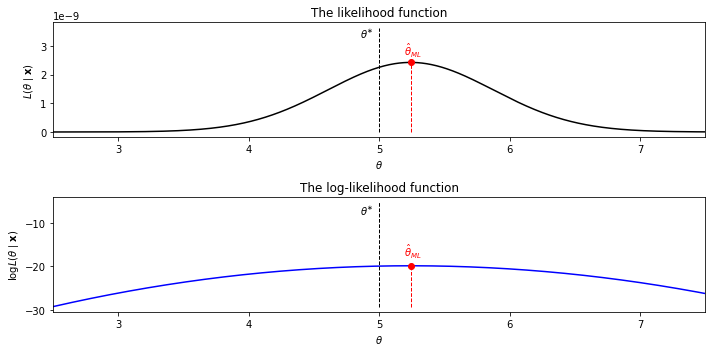

In [2]:
# set your parameters
n = 10

theta_star = 5
sigma = 2

# generate data
x = np.random.normal(theta_star, sigma, n)

# compute the likelihood and log-likelihood
thetas = np.linspace(2.5, 7.5, 1000)

likelihoods = []
loglikelihoods = []
for theta in thetas:
    likelihood = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta) ** 2))
    loglikelihood = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta) ** 2)
    
    likelihoods.append(likelihood)
    loglikelihoods.append(loglikelihood)

# compute the ML estimate
theta_ML = np.mean(x)
likelihood_ML = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta_ML) ** 2))
loglikelihood_ML = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta_ML) ** 2)

# plot the likelihood and loglikelihood functions
fig = plt.figure(figsize=(10, 5))

plt.subplot(211)
plt.plot(thetas, likelihoods, 'k')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$L(\theta \mid \mathbf{x})$")
plt.title("The likelihood function")
plt.xlim([2.5, 7.5])

# add the true theta and the ML estimate
plt.plot([theta_star, theta_star], [np.min(likelihoods), 1.5 * np.max(likelihoods)], color='k', linestyle='--', linewidth=1)
plt.text(theta_star - 0.15, 1.35 * np.max(likelihoods), r'$\theta^{\ast}$', size=10)

plt.plot(theta_ML, likelihood_ML, 'or')
plt.plot([theta_ML, theta_ML], [np.min(likelihoods), likelihood_ML], color='r', linestyle='--', linewidth=1)
plt.text(0.99 * theta_ML, 1.1 * likelihood_ML, r'$\hat{\theta}_{ML}$', size=10, color='r')


plt.subplot(212)
plt.plot(thetas, loglikelihoods, 'b')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log L(\theta \mid \mathbf{x})$")
plt.title("The log-likelihood function")
plt.xlim([2.5, 7.5])

# add the true theta and the ML estimate
plt.plot([theta_star, theta_star], [np.min(loglikelihoods), np.max(loglikelihoods) + 0.5 * np.abs(np.min(loglikelihoods))], color='k', linestyle='--', linewidth=1)
plt.text(theta_star - 0.15, np.max(loglikelihoods) + 0.4 * np.abs(np.min(loglikelihoods)), r'$\theta^{\ast}$', size=10)

plt.plot(theta_ML, loglikelihood_ML, 'or')
plt.plot([theta_ML, theta_ML], [np.min(loglikelihoods), loglikelihood_ML], color='r', linestyle='--', linewidth=1)
plt.text(0.99 * theta_ML, loglikelihood_ML + 0.075 * np.abs(np.min(loglikelihoods)), r'$\hat{\theta}_{ML}$', size=10, color='r')

fig.tight_layout()

We see that the maximum likelihood ends up being, as expected, the maximum of the likelihood and/or the log-likelihood functions. Note that, as we stressed in class, the _point_ where the maximum is attained is the same for both the likelihood and the log-likelihood; as we discussed, _increasing_ functions might change the _value_ of the maximum, but not the point that attains it!

### MAP estimation
In MAP estimation, conversely, we make explicit assumptions about the distribution of $\theta^{\ast}$. Let us specifically assume that $\theta^{\ast} \sim \mathcal{N}(\bar{\theta}, \tau^2)$. In layterms, this basically means that we know the mean is close to a number, say $5$, but we don't know it's exact value; it could be $5.12$ or $4.86$. Then, MAP estimation tries to strike a balance between "trusting" the data and using the prior information that we have. The posterior function in this case, as we saw in class, is given by

<center>$p_{\mathbf{X}}(\theta \mid \mathbf{x}) = \frac{p_{\mathbf{X}}(\mathbf{x} \mid \theta) \cdot p_{\theta}(\theta)}{p_{\mathbf{X}}(\mathbf{x})}$,</center>

where $p_{\mathbf{X}}(\mathbf{x} \mid \theta)$ is equal to the likelihood function $L(\theta \mid \mathbf{x})$. In this case, the MAP estimator is given by

<center>$\hat{\theta}_{\textrm{MAP}} = \frac{\tau^2}{n \tau^2 + \sigma^2}\sum_{i=1}^{n}x_i + \frac{\sigma^2}{n \tau^2 + \sigma^2}\bar{\theta}$.</center>

Below, let $\bar{\theta}$ be equal to the value you chose for $\theta^{\ast}$ before, and choose a value for $\tau^2$. Then, generate $\theta^{\ast}$ and sample `n = 10` samples from the data distribution. Plot the posterior and the log-posterior functions over a range of values for $\theta$. Overlay on your plots the true value $\theta^{\ast}$, along with the MAP estimate $\hat{\theta}_{\textrm{MAP}}$ and the maximum likelihood estimate $\hat{\theta}_{\textrm{ML}}$. In your computations of the posterior, feel free to ignore the term $p_{\mathbf{X}}(\mathbf{x})$, i.e.
<center>$p_{\mathbf{X}}(\theta \mid \mathbf{x}) = \frac{1}{(2\pi\sigma^2)^{\frac{n}{2}}} e^{-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \theta)^2} \cdot \frac{1}{\sqrt{2 \pi} \tau} e^{-\frac{1}{2\tau^2}(\theta-\bar{\theta})^2}$.</center>

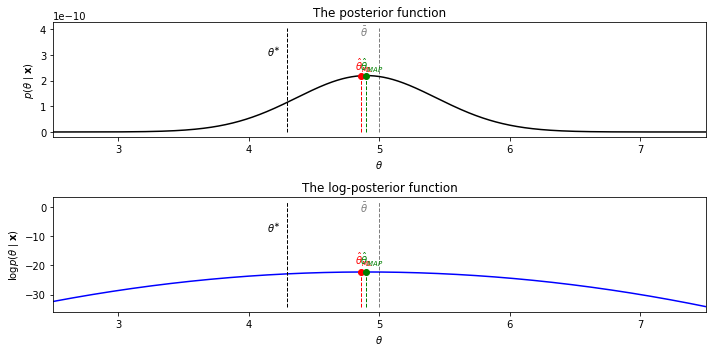

In [17]:
# set your parameters
theta_bar = 5
tau = 1

theta_star = np.random.normal(theta_bar, tau)

# generate data
x = np.random.normal(theta_star, sigma, n)

# compute the likelihood and log-likelihood
thetas = np.linspace(2.5, 7.5, 1000)

posteriors = []
logposteriors = []
for theta in thetas:
    posterior = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta) ** 2)) * 1 / (np.sqrt(2 * np.pi) * tau) * np.e ** (- 1 / (2 * tau ** 2) * (theta - theta_bar) ** 2)
    logposterior = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta) ** 2) + np.log(1 / (np.sqrt(2 * np.pi) * tau)) - 1 / (2 * tau ** 2) * (theta - theta_bar) ** 2
    
    posteriors.append(posterior)
    logposteriors.append(logposterior)

# compute the ML and MAP estimates
theta_MAP = tau ** 2 / (n * tau ** 2 + sigma ** 2) * np.sum(x) + sigma ** 2 / (n * tau ** 2 + sigma ** 2) * theta_bar
posterior_MAP = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta_MAP) ** 2)) * 1 / (np.sqrt(2 * np.pi) * tau) * np.e ** (- 1 / (2 * tau ** 2) * (theta_MAP - theta_bar) ** 2)
logposterior_MAP = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta_MAP) ** 2) + np.log(1 / (np.sqrt(2 * np.pi) * tau)) - 1 / (2 * tau ** 2) * (theta_MAP - theta_bar) ** 2

theta_ML = np.mean(x)
posterior_ML = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta_ML) ** 2)) * 1 / (np.sqrt(2 * np.pi) * tau) * np.e ** (- 1 / (2 * tau ** 2) * (theta_ML - theta_bar) ** 2)
logposterior_ML = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta_ML) ** 2) + np.log(1 / (np.sqrt(2 * np.pi) * tau)) - 1 / (2 * tau ** 2) * (theta_ML - theta_bar) ** 2

# plot the posterior and logposterior functions
fig = plt.figure(figsize=(10, 5))

plt.subplot(211)
plt.plot(thetas, posteriors, 'k')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta \mid \mathbf{x})$")
plt.title("The posterior function")
plt.xlim([2.5, 7.5])

# add the true theta, theta_bar, the ML, and the MAP estimates
plt.plot([theta_star, theta_star], [np.min(posteriors), 1.85 * np.max(posteriors)], color='k', linestyle='--', linewidth=1)
plt.text(theta_star - 0.15, 1.35 * np.max(posteriors), r'$\theta^{\ast}$', size=10)

plt.plot([theta_bar, theta_bar], [np.min(posteriors), 1.85 * np.max(posteriors)], color='k', linestyle='--', linewidth=1, alpha=0.5)
plt.text(theta_bar - 0.15, 1.7 * np.max(posteriors), r'$\bar{\theta}$', size=10, alpha=0.5)

plt.plot(theta_ML, posterior_ML, 'or')
plt.plot([theta_ML, theta_ML], [np.min(posteriors), posterior_ML], color='r', linestyle='--', linewidth=1)
plt.text(0.99 * theta_ML, 1.1 * posterior_ML, r'$\hat{\theta}_{ML}$', size=10, color='r')

plt.plot(theta_MAP, posterior_MAP, 'og')
plt.plot([theta_MAP, theta_MAP], [np.min(posteriors), posterior_MAP], color='g', linestyle='--', linewidth=1)
plt.text(0.99 * theta_MAP, 1.1 * posterior_MAP, r'$\hat{\theta}_{MAP}$', size=10, color='g')


plt.subplot(212)
plt.plot(thetas, logposteriors, 'b')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log p(\theta \mid \mathbf{x})$")
plt.title("The log-posterior function")
plt.xlim([2.5, 7.5])

# add the true theta, the ML, and the MAP estimates
plt.plot([theta_star, theta_star], [np.min(logposteriors), np.max(logposteriors) + 0.7 * np.abs(np.min(logposteriors))], color='k', linestyle='--', linewidth=1)
plt.text(theta_star - 0.15, np.max(logposteriors) + 0.4 * np.abs(np.min(logposteriors)), r'$\theta^{\ast}$', size=10)

plt.plot([theta_bar, theta_bar], [np.min(logposteriors), np.max(logposteriors) + 0.7 * np.abs(np.min(logposteriors))], color='k', linestyle='--', linewidth=1, alpha=0.5)
plt.text(theta_bar - 0.15, np.max(logposteriors) + 0.6 * np.abs(np.min(logposteriors)), r'$\bar{\theta}$', size=10, alpha=0.5)

plt.plot(theta_ML, logposterior_ML, 'or')
plt.plot([theta_ML, theta_ML], [np.min(logposteriors), logposterior_ML], color='r', linestyle='--', linewidth=1)
plt.text(0.99 * theta_ML, logposterior_ML + 0.075 * np.abs(np.min(logposteriors)), r'$\hat{\theta}_{ML}$', size=10, color='r')

plt.plot(theta_MAP, logposterior_MAP, 'og')
plt.plot([theta_MAP, theta_MAP], [np.min(logposteriors), logposterior_MAP], color='g', linestyle='--', linewidth=1)
plt.text(0.99 * theta_MAP, logposterior_MAP + 0.075 * np.abs(np.min(logposteriors)), r'$\hat{\theta}_{MAP}$', size=10, color='g')

fig.tight_layout()

### Effect of $\sigma^2$ and $\tau^2$
Having computed the MAP and ML estimates, let us examine now how they are affected by different choices of $\sigma^2$ and $\tau^2$. As a first exercise, plot the distribution of $\theta^{\ast} \sim \mathcal{N}(\bar{\theta}, \tau^2)$ for different values of $\tau$.

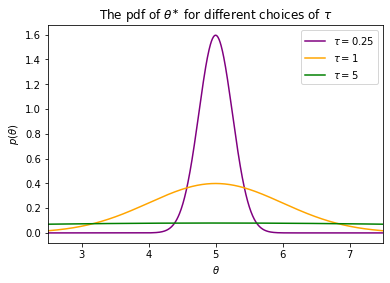

In [18]:
# set your parameters
theta_bar = 5
taus = [0.25, 1, 5]

thetas = np.linspace(2.5, 7.5, 1000)

# plot the densities in the same plot
density_1 = 1 / (np.sqrt(2 * np.pi) * taus[0]) * np.e ** (- 1 / (2 * taus[0] ** 2) * (thetas - theta_bar) ** 2)
plt.plot(thetas, density_1, 'purple', label=r"$\tau = 0.25$")

density_2 = 1 / (np.sqrt(2 * np.pi) * taus[1]) * np.e ** (- 1 / (2 * taus[1] ** 2) * (thetas - theta_bar) ** 2)
plt.plot(thetas, density_2, 'orange', label=r"$\tau = 1$")

density_3 = 1 / (np.sqrt(2 * np.pi) * taus[2]) * np.e ** (- 1 / (2 * taus[2] ** 2) * (thetas - theta_bar) ** 2)
plt.plot(thetas, density_3, 'green', label=r"$\tau = 5$")

plt.xlim([2.5, 7.5])
plt.title(r"The pdf of $\theta^{\ast}$ for different choices of $\tau$")
plt.ylabel(r"$p(\theta)$")
plt.xlabel(r"$\theta$")
plt.legend()

Note that the above describes the _prior distribution_ of $\theta^{\ast}$. In other words, it encodes the prior information we may have about $\theta^{\ast}$; when $\tau$ is small, we are pretty confident that we have a good initial "guess" for $\theta^{\ast}$. Conversely, when $\tau$ is large, virtually any $\theta$ is equally likely to be the true value of $\theta^{\ast}$.

Next, repeat the MAP and ML estimations for the two different values of $\tau$ that are indicated. Also, plot the estimators again for a much higher value of $\sigma$.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(4.9660540304870695, 55.23906735865988, '$\\hat{\\theta}_{MAP}$')

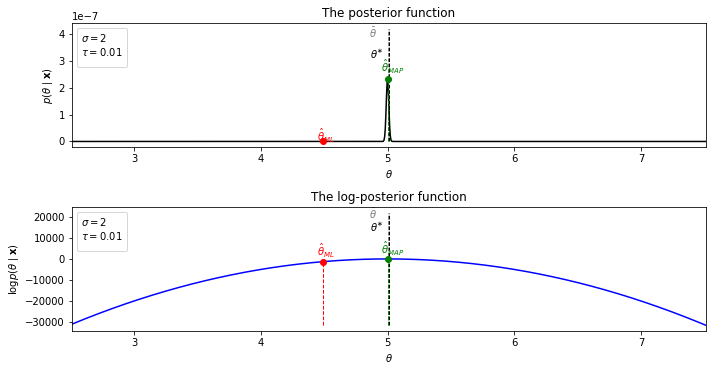

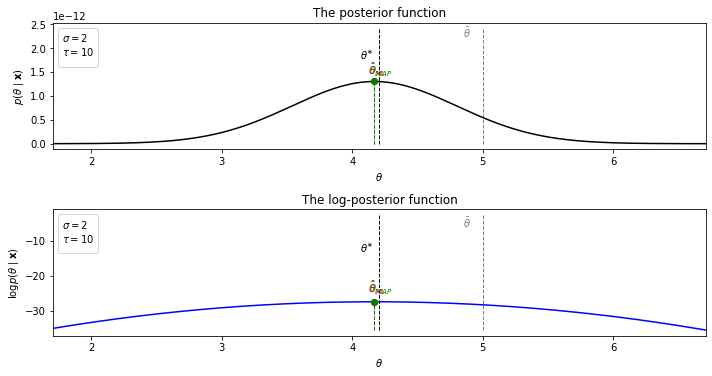

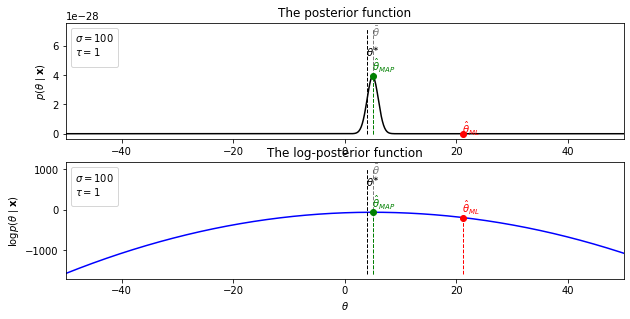

In [21]:
# vary tau
theta_bar = 5
sigma = 2
taus = [0.01, 10]

for idx in range(len(taus)):
    tau = taus[idx]
    theta_star = np.random.normal(theta_bar, tau)

    # generate data
    x = np.random.normal(theta_star, sigma, n)

    # compute the likelihood and log-likelihood
    thetas = np.linspace(theta_star - 2.5, theta_star + 2.5, 1000)

    posteriors = []
    logposteriors = []
    for theta in thetas:
        posterior = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta) ** 2)) * 1 / (np.sqrt(2 * np.pi) * tau) * np.e ** (- 1 / (2 * tau ** 2) * (theta - theta_bar) ** 2)
        logposterior = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta) ** 2) + np.log(1 / (np.sqrt(2 * np.pi) * tau)) - 1 / (2 * tau ** 2) * (theta - theta_bar) ** 2

        posteriors.append(posterior)
        logposteriors.append(logposterior)

    # compute the ML and MAP estimates
    theta_MAP = tau ** 2 / (n * tau ** 2 + sigma ** 2) * np.sum(x) + sigma ** 2 / (n * tau ** 2 + sigma ** 2) * theta_bar
    posterior_MAP = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta_MAP) ** 2)) * 1 / (np.sqrt(2 * np.pi) * tau) * np.e ** (- 1 / (2 * tau ** 2) * (theta_MAP - theta_bar) ** 2)
    logposterior_MAP = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta_MAP) ** 2) + np.log(1 / (np.sqrt(2 * np.pi) * tau)) - 1 / (2 * tau ** 2) * (theta_MAP - theta_bar) ** 2

    theta_ML = np.mean(x)
    posterior_ML = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta_ML) ** 2)) * 1 / (np.sqrt(2 * np.pi) * tau) * np.e ** (- 1 / (2 * tau ** 2) * (theta_ML - theta_bar) ** 2)
    logposterior_ML = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta_ML) ** 2) + np.log(1 / (np.sqrt(2 * np.pi) * tau)) - 1 / (2 * tau ** 2) * (theta_ML - theta_bar) ** 2

    # plot the posterior and logposterior functions
    fig = plt.figure(figsize=(10, 15))
    plt.subplot(611 + idx)
    plt.plot(thetas, posteriors, 'k')
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$p(\theta \mid \mathbf{x})$")
    plt.title("The posterior function")
    plt.xlim([theta_star - 2.5, theta_star + 2.5])
    
    # add tau, sigma
    plt.legend(loc='upper left', title="$\sigma = {}$\n$\\tau = {}$".format(sigma, tau))

    # add the true theta, the ML, and the MAP estimates
    plt.plot([theta_star, theta_star], [np.min(posteriors), 1.85 * np.max(posteriors)], color='k', linestyle='--', linewidth=1)
    plt.text(theta_star - 0.15, 1.35 * np.max(posteriors), r'$\theta^{\ast}$', size=10)
    
    plt.plot([theta_bar, theta_bar], [np.min(posteriors), 1.85 * np.max(posteriors)], color='k', linestyle='--', linewidth=1, alpha=0.5)
    plt.text(theta_bar - 0.15, 1.7 * np.max(posteriors), r'$\bar{\theta}$', size=10, alpha=0.5)

    plt.plot(theta_ML, posterior_ML, 'or')
    plt.plot([theta_ML, theta_ML], [np.min(posteriors), posterior_ML], color='r', linestyle='--', linewidth=1)
    plt.text(0.99 * theta_ML, 1.1 * posterior_ML, r'$\hat{\theta}_{ML}$', size=10, color='r')

    plt.plot(theta_MAP, posterior_MAP, 'og')
    plt.plot([theta_MAP, theta_MAP], [np.min(posteriors), posterior_MAP], color='g', linestyle='--', linewidth=1)
    plt.text(0.99 * theta_MAP, 1.1 * posterior_MAP, r'$\hat{\theta}_{MAP}$', size=10, color='g')


    plt.subplot(611 + idx + 1)
    plt.plot(thetas, logposteriors, 'b')
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$\log p(\theta \mid \mathbf{x})$")
    plt.title("The log-posterior function")
    plt.xlim([theta_star - 2.5, theta_star + 2.5])
    
    # add tau, sigma
    plt.legend(loc='upper left', title="$\sigma = {}$\n$\\tau = {}$".format(sigma, tau))

    # add the true theta, the ML, and the MAP estimates
    plt.plot([theta_star, theta_star], [np.min(logposteriors), np.max(logposteriors) + 0.7 * np.abs(np.min(logposteriors))], color='k', linestyle='--', linewidth=1)
    plt.text(theta_star - 0.15, np.max(logposteriors) + 0.4 * np.abs(np.min(logposteriors)), r'$\theta^{\ast}$', size=10)

    plt.plot([theta_bar, theta_bar], [np.min(logposteriors), np.max(logposteriors) + 0.7 * np.abs(np.min(logposteriors))], color='k', linestyle='--', linewidth=1, alpha=0.5)
    plt.text(theta_bar - 0.15, np.max(logposteriors) + 0.6 * np.abs(np.min(logposteriors)), r'$\bar{\theta}$', size=10, alpha=0.5)
    
    plt.plot(theta_ML, logposterior_ML, 'or')
    plt.plot([theta_ML, theta_ML], [np.min(logposteriors), logposterior_ML], color='r', linestyle='--', linewidth=1)
    plt.text(0.99 * theta_ML, logposterior_ML + 0.075 * np.abs(np.min(logposteriors)), r'$\hat{\theta}_{ML}$', size=10, color='r')

    plt.plot(theta_MAP, logposterior_MAP, 'og')
    plt.plot([theta_MAP, theta_MAP], [np.min(logposteriors), logposterior_MAP], color='g', linestyle='--', linewidth=1)
    plt.text(0.99 * theta_MAP, logposterior_MAP + 0.075 * np.abs(np.min(logposteriors)), r'$\hat{\theta}_{MAP}$', size=10, color='g')
    
    fig.tight_layout()
    
# high sigma
sigma = 100
tau = 1

theta_star = np.random.normal(theta_bar, tau)

# generate data
x = np.random.normal(theta_star, sigma, n)

# compute the likelihood and log-likelihood
thetas = np.linspace(-50, 50, 1000)

posteriors = []
logposteriors = []
for theta in thetas:
    posterior = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta) ** 2)) * 1 / (np.sqrt(2 * np.pi) * tau) * np.e ** (- 1 / (2 * tau ** 2) * (theta - theta_bar) ** 2)
    logposterior = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta) ** 2) + np.log(1 / (np.sqrt(2 * np.pi) * tau)) - 1 / (2 * tau ** 2) * (theta - theta_bar) ** 2

    posteriors.append(posterior)
    logposteriors.append(logposterior)

# compute the ML and MAP estimates
theta_MAP = tau ** 2 / (n * tau ** 2 + sigma ** 2) * np.sum(x) + sigma ** 2 / (n * tau ** 2 + sigma ** 2) * theta_bar
posterior_MAP = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta_MAP) ** 2)) * 1 / (np.sqrt(2 * np.pi) * tau) * np.e ** (- 1 / (2 * tau ** 2) * (theta_MAP - theta_bar) ** 2)
logposterior_MAP = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta_MAP) ** 2) + np.log(1 / (np.sqrt(2 * np.pi) * tau)) - 1 / (2 * tau ** 2) * (theta_MAP - theta_bar) ** 2

theta_ML = np.mean(x)
posterior_ML = 1 / (2 * np.pi * sigma ** 2) ** (n / 2) * np.e ** (- 1 / (2 * sigma ** 2) * np.sum((x - theta_ML) ** 2)) * 1 / (np.sqrt(2 * np.pi) * tau) * np.e ** (- 1 / (2 * tau ** 2) * (theta_ML - theta_bar) ** 2)
logposterior_ML = np.log(1 / (2 * np.pi * sigma ** 2) ** (n / 2)) - 1 / (2 * sigma ** 2) * np.sum((x - theta_ML) ** 2) + np.log(1 / (np.sqrt(2 * np.pi) * tau)) - 1 / (2 * tau ** 2) * (theta_ML - theta_bar) ** 2

# plot the posterior and logposterior functions
fig = plt.figure(figsize=(10, 15))
plt.subplot(615)
plt.plot(thetas, posteriors, 'k')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta \mid \mathbf{x})$")
plt.title("The posterior function")
plt.xlim([-50, 50])

# add tau, sigma
plt.legend(loc='upper left', title="$\sigma = {}$\n$\\tau = {}$".format(sigma, tau))

# add the true theta, the ML, and the MAP estimates
plt.plot([theta_star, theta_star], [np.min(posteriors), 1.85 * np.max(posteriors)], color='k', linestyle='--', linewidth=1)
plt.text(theta_star - 0.15, 1.35 * np.max(posteriors), r'$\theta^{\ast}$', size=10)

plt.plot([theta_bar, theta_bar], [np.min(posteriors), 1.85 * np.max(posteriors)], color='k', linestyle='--', linewidth=1, alpha=0.5)
plt.text(theta_bar - 0.15, 1.7 * np.max(posteriors), r'$\bar{\theta}$', size=10, alpha=0.5)

plt.plot(theta_ML, posterior_ML, 'or')
plt.plot([theta_ML, theta_ML], [np.min(posteriors), posterior_ML], color='r', linestyle='--', linewidth=1)
plt.text(0.99 * theta_ML, 1.1 * posterior_ML, r'$\hat{\theta}_{ML}$', size=10, color='r')

plt.plot(theta_MAP, posterior_MAP, 'og')
plt.plot([theta_MAP, theta_MAP], [np.min(posteriors), posterior_MAP], color='g', linestyle='--', linewidth=1)
plt.text(0.99 * theta_MAP, 1.1 * posterior_MAP, r'$\hat{\theta}_{MAP}$', size=10, color='g')


plt.subplot(616)
plt.plot(thetas, logposteriors, 'b')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log p(\theta \mid \mathbf{x})$")
plt.title("The log-posterior function")
plt.xlim([-50, 50])

# add tau, sigma
plt.legend(loc='upper left', title="$\sigma = {}$\n$\\tau = {}$".format(sigma, tau))

# add the true theta, the ML, and the MAP estimates
plt.plot([theta_star, theta_star], [np.min(logposteriors), np.max(logposteriors) + 0.7 * np.abs(np.min(logposteriors))], color='k', linestyle='--', linewidth=1)
plt.text(theta_star - 0.15, np.max(logposteriors) + 0.4 * np.abs(np.min(logposteriors)), r'$\theta^{\ast}$', size=10)

plt.plot([theta_bar, theta_bar], [np.min(logposteriors), np.max(logposteriors) + 0.7 * np.abs(np.min(logposteriors))], color='k', linestyle='--', linewidth=1, alpha=0.5)
plt.text(theta_bar - 0.15, np.max(logposteriors) + 0.6 * np.abs(np.min(logposteriors)), r'$\bar{\theta}$', size=10, alpha=0.5)

plt.plot(theta_ML, logposterior_ML, 'or')
plt.plot([theta_ML, theta_ML], [np.min(logposteriors), logposterior_ML], color='r', linestyle='--', linewidth=1)
plt.text(0.99 * theta_ML, logposterior_ML + 0.075 * np.abs(np.min(logposteriors)), r'$\hat{\theta}_{ML}$', size=10, color='r')

plt.plot(theta_MAP, logposterior_MAP, 'og')
plt.plot([theta_MAP, theta_MAP], [np.min(logposteriors), logposterior_MAP], color='g', linestyle='--', linewidth=1)
plt.text(0.99 * theta_MAP, logposterior_MAP + 0.075 * np.abs(np.min(logposteriors)), r'$\hat{\theta}_{MAP}$', size=10, color='g')

## Principal Component Analysis

We spent quite a few lectures and sections talking about PCA, and you implemented versions of it for `PSet 3` and `Lab 3`. In this notebook, we want to emphasize the steps of PCA, in a visual manner. Moreover, we will point out some of the common _pitfalls_ of PCA; namely, where and when it doesn't work as well as we'd hope.

We will spare the excruciating details that we went over during class, as well as the exposition of the properties of the covariance matrix. We will only, for completeness, formally state the setting. Consider some data unlabelled $\mathbf{X} \in \mathbb{R}^{n \times m}$. Center the data and let $\mathbf{X}_c = \mathbf{X} - \mathbb{E}(\mathbf{X})$. Then, $\boldsymbol{\Sigma} = \operatorname{Cov}(\mathbf{X}_c)$ is a symmetric matrix, and has an eigenvalue decomposition, let $\boldsymbol{\Sigma} = \mathbf{W} \boldsymbol{\Lambda} \mathbf{W}^{-1}$, with $\mathbf{W}\mathbf{W}^T = \mathbf{I}$. Then the columns of $\mathbf{W}$ are called _principal directions_, and PCA is defined as the projection of the data on the principal components

<center>$\mathbf{Y} = \mathbf{W}^T\mathbf{X}_c.$</center>
    
PCA is an extremely powerful tool, most frequently used for _dimentionality reduction_. A few things to keep in mind about PCA:
- PCA simply finds another basis to represent the data; namely, it finds the vectors along the directions with _maximal variance_. However, this is done in a _greedy_ manner, and not in a _joint_ maximization of the variance.
- PCA creates an _orthonormal basis_ (which, in many cases, is a _pitfall_).
As a final comment before we begin, we can think of PCA as changing the point from which we're looking at an object (we will come back to that perspective later on during the notebook).

### Elementary PCA
To set the setting, let's generate some data from an ellipse. In the following `code` cell, generate data that abides by the equation of an ellipse of your choice. To make things more interesting, rotate your data, and make sure that they are centered somewhere away from zero.

Text(0.5, 1.0, 'Data sampled on an ellipse')

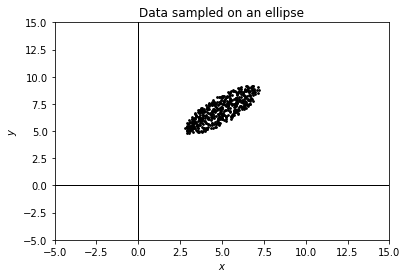

In [51]:
# set the number of data points and parameters
n = 5000

x_denom = 9
y_denom = 1
theta = -np.pi / 4

# generate random points
random_points = np.random.uniform(-5, 5, (n, 2))

# keep only the ones that satisfy the ellipse equation
ellipse = [[x, y] for x, y in random_points if x ** 2 / x_denom + y ** 2 / y_denom <= 1]
ellipse = np.array(ellipse)

# rotate it and make sure it is away from zero
x = ellipse[:, 0] * np.cos(theta) + ellipse[:, 1] * np.sin(theta)
y = -ellipse[:, 0] * np.sin(theta) + ellipse[:, 1] * np.cos(theta)

x += 5
y += 7

# plot the data
plt.scatter(x, y, s=3, marker='o', c='k')

# axes for visualization purposes
plt.plot([-5, 15], [0, 0], color='k', linewidth=1)
plt.plot([0, 0], [-5, 15], color='k', linewidth=1)

plt.xlim([-5, 15])
plt.ylim([-5, 15])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Data sampled on an ellipse")

Let us now perform PCA. Our goal here is to plot the data and the principal directions after every step, to try and get a better understanding of exactly what PCA does. Let us again restate the steps of PCA, so we are all on the same page regarding what we need to do in what follows

1. The first step towards PCA is centering our data around zero.
2. Then, we compute the covariance matrix of the data.
3. The _principal directions_ are defined as the eigenvectors of the covariance matrix.
4. (Optional) We only keep a few coefficients.
5. We project the data on the principal dimensions.
6. To reconstruct, we "invert" the transformation to go back to the original domain.
7. We re-add the mean to get the same representation.

So, let's begin. 🤓 As the first step dictates, recenter your data and plot the zero-mean'ed and the original data on the same plot.

Text(0.5, 1.0, 'Data sampled on an ellipse')

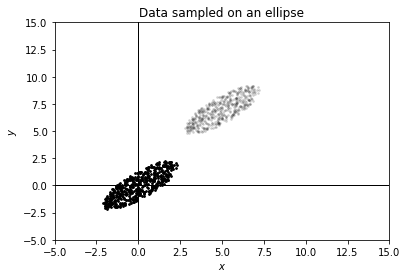

In [52]:
# center the data
mean_x = np.mean(x)
mean_y = np.mean(y)

x_zm = x - mean_x
y_zm = y - mean_y

# plot the data
plt.scatter(x, y, s=3, marker='o', c='k', alpha=0.125)
plt.scatter(x_zm, y_zm, s=3, marker='o', c='k')

# axes for visualization purposes
plt.plot([-5, 15], [0, 0], color='k', linewidth=1)
plt.plot([0, 0], [-5, 15], color='k', linewidth=1)

plt.xlim([-5, 15])
plt.ylim([-5, 15])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Data sampled on an ellipse")

We then need to compute the _principal directions_. Again, these are simply the eigenvectors of the covariance matrix of the centered data. Compoute the principal directions, and plot them overlayed on both the original and the zero-meaned data.

Text(0.5, 1.0, 'Data sampled on an ellipse')

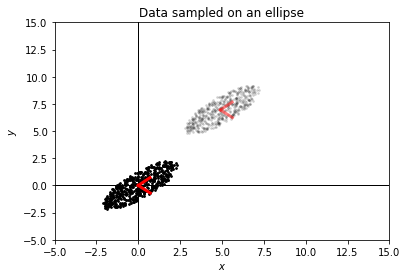

In [53]:
N = len(x)
data = np.zeros((2, N))
data[0, :] = x_zm
data[1, :] = y_zm

# compute the covariance matrix
cov_x = np.cov(data)

# compute the eigenvectors
vals, V = np.linalg.eig(cov_x)

# plot the data
plt.scatter(x, y, s=3, marker='o', c='k', alpha=0.125)
plt.scatter(x_zm, y_zm, s=3, marker='o', c='k')

# axes for visualization purposes
plt.plot([-5, 15], [0, 0], color='k', linewidth=1)
plt.plot([0, 0], [-5, 15], color='k', linewidth=1)

# plot the principal directions
plt.plot([0, V[0][0]], [0, V[0][1]], color='r', linewidth=3)
plt.plot([0, V[1][0]], [0, V[1][1]], color='r', linewidth=3)

# also overlayed on the original data
plt.plot([mean_x, V[0][0] + mean_x], [mean_y, V[0][1] + mean_y], color='r', linewidth=3, alpha=0.5)
plt.plot([mean_x, V[1][0] + mean_x], [mean_y, V[1][1] + mean_y], color='r', linewidth=3, alpha=0.5)

plt.xlim([-5, 15])
plt.ylim([-5, 15])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Data sampled on an ellipse")

We see that the first principal direction is chosen along the axis with the _greatest_ variance. Then, the next direction of maximum variance is chosen, **but** under the constraint that it is _orthogonal_ to the first one. In the following `code` block, project both the original and the centered data on the principal components and plot everything on the same plot.

Text(0.5, 1.0, 'Data sampled on an ellipse')

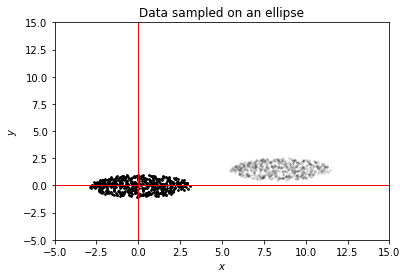

In [54]:
data_orig = np.zeros((2, N))
data_orig[0, :] = x
data_orig[1, :] = y

# project the data on the principal components
pc_data = np.dot(V.T, data)
pc_data_orig = np.dot(V.T, data_orig)

# plot the data
plt.scatter(pc_data[0, :], pc_data[1, :], s=3, marker='o', c='k')
plt.scatter(pc_data_orig[0, :], pc_data_orig[1, :], s=3, marker='o', c='k', alpha=0.125)

# plot the new axes
plt.plot([-5, 15], [0, 0], color='r', linewidth=1)
plt.plot([0, 0], [-5, 15], color='r', linewidth=1)

plt.xlim([-5, 15])
plt.ylim([-5, 15])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Data sampled on an ellipse")

We see that PCA generated axes along the directions that are minimizing the variance. Remember what we said; we can think of PCA as simply moving around the space and changing our point of view. Our original data was like a _frisbee_; all we did was change the viewpoint of the frisbee to see it in a clearer light.

**Note**: with the risk of going on a tangent, this interpretation of PCA that we're introducing is not entirely arbitrary. On the contrary, by construction $\mathbf{W}$ is an _orthonormal_ matrix. These matrices have a special place in algebra; the comprise the _special orthogonal group_ $SO(n)$. This group is also, aptly, called the _rotation group_; these matrices are transformations that generalize the notion of rotation to any dimension.

Next, we will apply the "inverse" transformation to go back to the original domain. Note that in our simple example, we didn't really prune any of the dimensions, so the plot we expect to see is _identical_ to the one where we simply centered the data. In an actual application with _high-dimensional data_, we would only keep a few of the principal components before projecting back, resulting in a _low-dimensional_ approximation of the original data. Apply the "inverse" transformation and plot again the centered and the original data.

Text(0.5, 1.0, 'Data sampled on an ellipse')

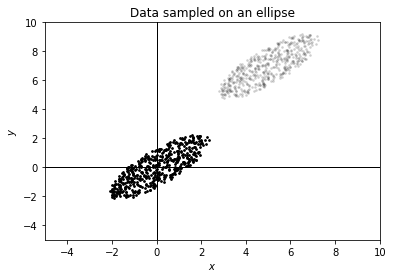

In [55]:
# "invert" the projection
data_recon = np.dot(V, pc_data)
data_orig_recon = np.dot(V, pc_data_orig)

# plot the data
plt.scatter(data_recon[0, :], data_recon[1, :], s=3, marker='o', c='k')
plt.scatter(data_orig_recon[0, :], data_orig_recon[1, :], s=3, marker='o', c='k', alpha=0.125)

# add the axes
plt.plot([-5, 10], [0, 0], color='k', linewidth=1)
plt.plot([0, 0], [-5, 10], color='k', linewidth=1)

plt.xlim([-5, 10])
plt.ylim([-5, 10])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Data sampled on an ellipse")

Finally, adding back the means of each dimension will get us, faithfully, back to our original data magnitudes.

Text(0.5, 1.0, 'Data sampled on an ellipse')

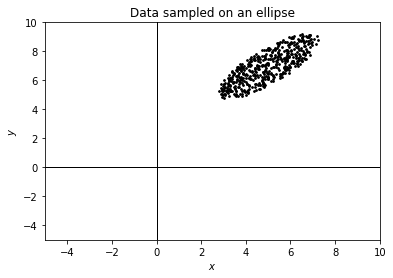

In [56]:
data_recon_m = data_recon

# add back the means
data_recon_m[0, :] += mean_x
data_recon_m[1, :] += mean_y

# plot the data
plt.scatter(data_recon_m[0, :], data_recon_m[1, :], s=3, marker='o', c='k')

# add the axes
plt.plot([-5, 10], [0, 0], color='k', linewidth=1)
plt.plot([0, 0], [-5, 10], color='k', linewidth=1)

plt.xlim([-5, 10])
plt.ylim([-5, 10])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Data sampled on an ellipse")

### PCA pitfalls 👎
So far PCA seems pretty awesome! It is an extremely powerful tool, that is based on a very simple and intuitive idea, and is very easy to implement. There has to be a catch, _right_?

As we mentioned before, the principal directions _have_ to be orthogonal to each other. Therefore, PCA will have rather poor performance when the data dimensions aren't orthogonal to each other.

Another pitfall, in conjuction with the orthogonality constraint, is that PCA maximizes variance in a _greedy_ manner. What that means is that it chooses the direction of maximum variance, and _then_ chooses another direction orthogonal to that. However, if the directions (again, baring the constraint of orthogonality) were chosen _jointly_, rather than _sequentially_, we could minimize the overall variance of the data.

Let us try to illustrate these two pitfalls in conjuction, by showing an example where the principal directions chosen by PCA seem like a rather poor choice. To that end, generate again data from _two_, this time, ellipses so that they create an overall "X" shaped pattern.

Text(0.5, 1.0, 'X-shaped data sampled on two ellipses')

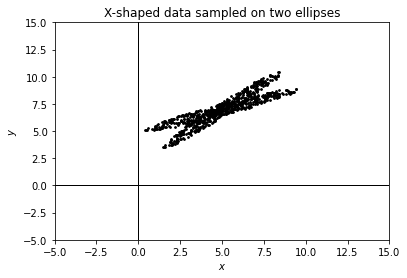

In [57]:
# set the number of data points and parameters
n = 5000

x_denom = 25
y_denom = 0.25
theta_1 = -np.pi / 4
theta_2 = -np.pi / 8

# generate random points
random_points = np.random.uniform(-5, 5, (n, 2))

# keep only the ones that satisfy the equation
ellipse = [[x, y] for x, y in random_points if x ** 2 / x_denom + y ** 2 / y_denom <= 1]
ellipse = np.array(ellipse)

# create the first part of the X
x = ellipse[:, 0] * np.cos(theta_1) + ellipse[:, 1] * np.sin(theta_1)
y = -ellipse[:, 0] * np.sin(theta_1) + ellipse[:, 1] * np.cos(theta_1)

x += 5
y += 7

# create the second part of the X
x_e = ellipse[:, 0] * np.cos(theta_2) + ellipse[:, 1] * np.sin(theta_2)
y_e = -ellipse[:, 0] * np.sin(theta_2) + ellipse[:, 1] * np.cos(theta_2)

x_e += 5
y_e += 7

x_n = np.concatenate((x, x_e))
y_n = np.concatenate((y, y_e))

# plot the data
plt.scatter(x_n, y_n, s=3, marker='o', c='k')

# axes for visualization purposes
plt.plot([-5, 15], [0, 0], color='k', linewidth=1)
plt.plot([0, 0], [-5, 15], color='k', linewidth=1)

plt.xlim([-5, 15])
plt.ylim([-5, 15])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("X-shaped data sampled on two ellipses")

So why is this particular dataset interesting? Well, we see that the data lie along directions that are not orthogonal, and still have a decent amount of variance along those directions. What do you expect the principal directions will look like for the above dataset? Compute the principal directions below, and overlay them in both the centered and the original dataset.

Text(0.5, 1.0, 'X-shaped data sampled on two ellipses')

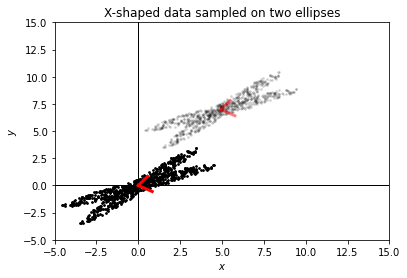

In [58]:
# zero mean the data
mean_xn = np.mean(x_n)
mean_yn = np.mean(y_n)

xn_zm = x_n - mean_xn
yn_zm = y_n - mean_yn

N = len(x_n)
data_n = np.zeros((2, N))
data_n[0, :] = xn_zm
data_n[1, :] = yn_zm

# compute the covariance matrix
cov_xn = np.cov(data_n)

# compute the eigenvectors
vals_n, V_n = np.linalg.eig(cov_xn)

# plot the data
plt.scatter(x_n, y_n, s=3, marker='o', c='k', alpha=0.125)
plt.scatter(xn_zm, yn_zm, s=3, marker='o', c='k')

# axes for visualization purposes
plt.plot([-5, 15], [0, 0], color='k', linewidth=1)
plt.plot([0, 0], [-5, 15], color='k', linewidth=1)

# plot the principal directions
plt.plot([0, V_n[0][0]], [0, V_n[0][1]], color='r', linewidth=3)
plt.plot([0, V_n[1][0]], [0, V_n[1][1]], color='r', linewidth=3)

# also overlayed on the original data
plt.plot([mean_xn, V_n[0][0] + mean_xn], [mean_yn, V_n[0][1] + mean_yn], color='r', linewidth=3, alpha=0.5)
plt.plot([mean_xn, V_n[1][0] + mean_xn], [mean_yn, V_n[1][1] + mean_yn], color='r', linewidth=3, alpha=0.5)

plt.xlim([-5, 15])
plt.ylim([-5, 15])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("X-shaped data sampled on two ellipses")

Hmmm, were you expecting these principal directions? 🤔 We see that, even though these directions are orthogonal to each other and are along the directions of maximal variance, they are not very good for modeling the data. In the next `code` block, project the data onto the principal dimensions so we can have a closer look.

Text(0.5, 1.0, 'X-shaped data sampled on two ellipses')

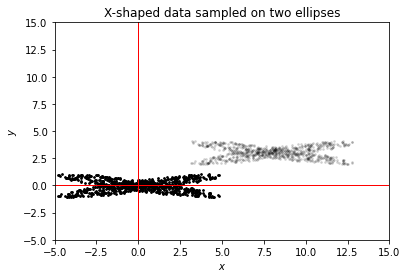

In [59]:
data_orig_n = np.zeros((2, N))
data_orig_n[0, :] = x_n
data_orig_n[1, :] = y_n

# project the data on the principal components
pc_data_n = np.dot(V_n.T, data_n)
pc_data_orig_n = np.dot(V_n.T, data_orig_n)

# plot the data
plt.scatter(pc_data_n[0, :], pc_data_n[1, :], s=3, marker='o', c='k')
plt.scatter(pc_data_orig_n[0, :], pc_data_orig_n[1, :], s=3, marker='o', c='k', alpha=0.125)

# plot the new axes
plt.plot([-5, 15], [0, 0], color='r', linewidth=1)
plt.plot([0, 0], [-5, 15], color='r', linewidth=1)

plt.xlim([-5, 15])
plt.ylim([-5, 15])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("X-shaped data sampled on two ellipses")

As expected, the axes don't really align with the parts of the data that we would expect; this is an example of a dataset where PCA performs poorly. Some of the reasons for this are, as we mentioned, that PCA enforces orthogonality on the representation, and also the principal directions are chosen in a greedy manner.

However, another reason why PCA underperforms is that it doesn't, in any way, try to optimize the _representation_ of the data; instead, it simply tries to optimize the variance. There are other approahces, such as _dictionary learning_ that explicitly try to optimize the data representation.

I hope you enjoyed this week's notebook. Please take a minute to fill out the feedback [form]().